# **Support Vector Machine (SVM)**
---
Support Vector Machine Multiple Output Model

In [1]:
pip install joblib

In [2]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
import math

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Geomechanical_Properties_Prediction_DataSet.xlsx to Geomechanical_Properties_Prediction_DataSet.xlsx


In [5]:
df=pd.read_excel('Geomechanical_Properties_Prediction_DataSet.xlsx')

In [6]:
df.describe()

,Depth,Resistivity,Gamma Ray,Total Porosity,Effective Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,7280.750000,146.141582,116.270437,0.059863,0.038633,2.652268,73.176217,123.929532
std,274.890887,322.464089,61.220418,0.023739,0.023542,0.072419,10.732976,19.252592
min,6805.000000,17.413170,24.463470,0.002870,0.002120,2.428950,50.805650,85.474240
25%,7042.875000,62.688825,84.264097,0.042928,0.019688,2.601138,64.791450,114.705535
50%,7280.750000,85.495010,117.570395,0.055185,0.037425,2.658085,72.718335,127.687235
75%,7518.625000,121.405745,130.947013,0.074783,0.054220,2.707355,80.846762,137.370110
max,7756.500000,7223.240720,623.150210,0.142080,0.119320,2.849760,101.455720,184.778790


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Depth                         1904 non-null   float64
 1   Resistivity                   1904 non-null   float64
 2   Gamma Ray                     1904 non-null   float64
 3   Total Porosity                1904 non-null   float64
 4   Effective Porosity            1904 non-null   float64
 5   Bulk Density                  1904 non-null   float64
 6   Compression Wave Travel Time  1904 non-null   float64
 7   Shear Wave Travel Time        1904 non-null   float64
dtypes: float64(8)
memory usage: 119.1 KB


In [8]:
df.columns

Index(['Depth', 'Resistivity', 'Gamma Ray', 'Total Porosity',
       'Effective Porosity', 'Bulk Density', 'Compression Wave Travel Time',
       'Shear Wave Travel Time'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

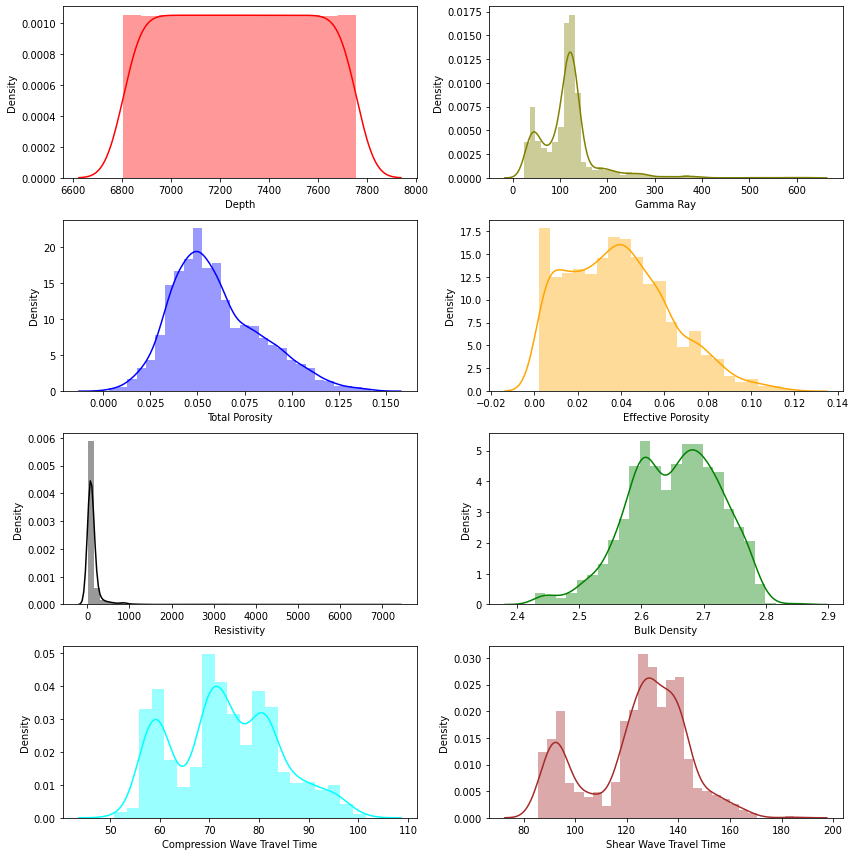

In [9]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.distplot(df['Depth'] , color="red", ax=axes[0, 0])
sns.distplot(df['Gamma Ray'] , color="olive", ax=axes[0, 1])
sns.distplot(df['Total Porosity'] , color="blue", ax=axes[1, 0])
sns.distplot(df['Effective Porosity'] , color="orange", ax=axes[1, 1])
sns.distplot(df['Resistivity'] , color="black", ax=axes[2, 0])
sns.distplot(df['Bulk Density'] , color="green", ax=axes[2, 1])
sns.distplot(df['Compression Wave Travel Time'] , color="cyan", ax=axes[3, 0])
sns.distplot(df['Shear Wave Travel Time'] , color="brown", ax=axes[3, 1])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

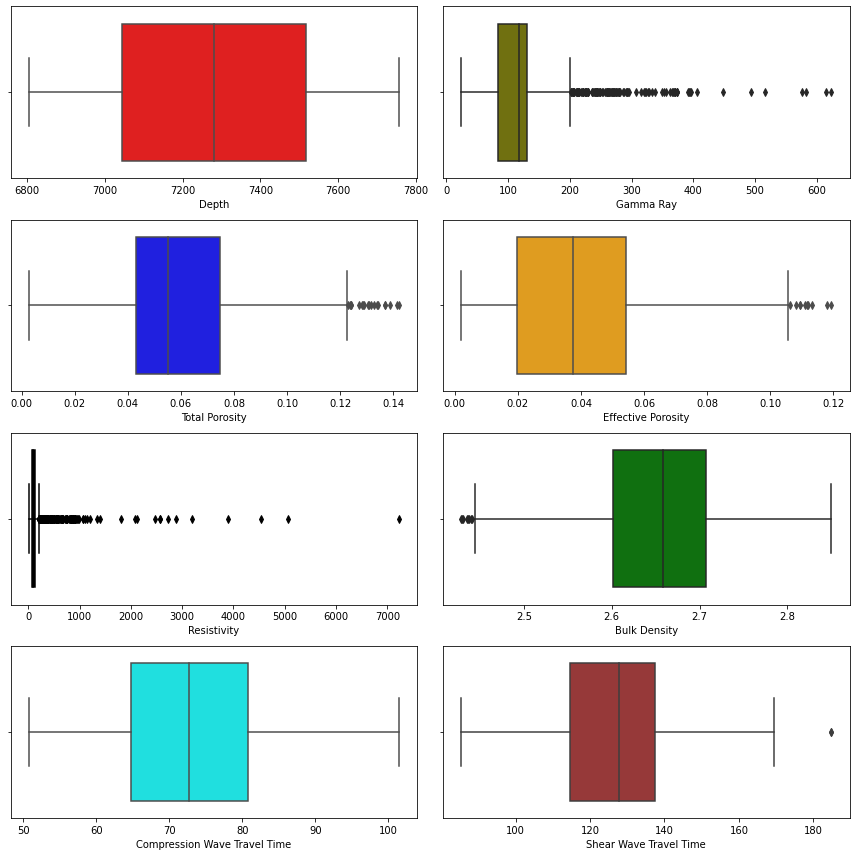

In [10]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.boxplot(df['Depth'] , color="red", ax=axes[0, 0])
sns.boxplot(df['Gamma Ray'] , color="olive", ax=axes[0, 1])
sns.boxplot(df['Total Porosity'] , color="blue", ax=axes[1, 0])
sns.boxplot(df['Effective Porosity'] , color="orange", ax=axes[1, 1])
sns.boxplot(df['Resistivity'] , color="black", ax=axes[2, 0])
sns.boxplot(df['Bulk Density'] , color="green", ax=axes[2, 1])
sns.boxplot(df['Compression Wave Travel Time'] , color="cyan", ax=axes[3, 0])
sns.boxplot(df['Shear Wave Travel Time'] , color="brown", ax=axes[3, 1])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

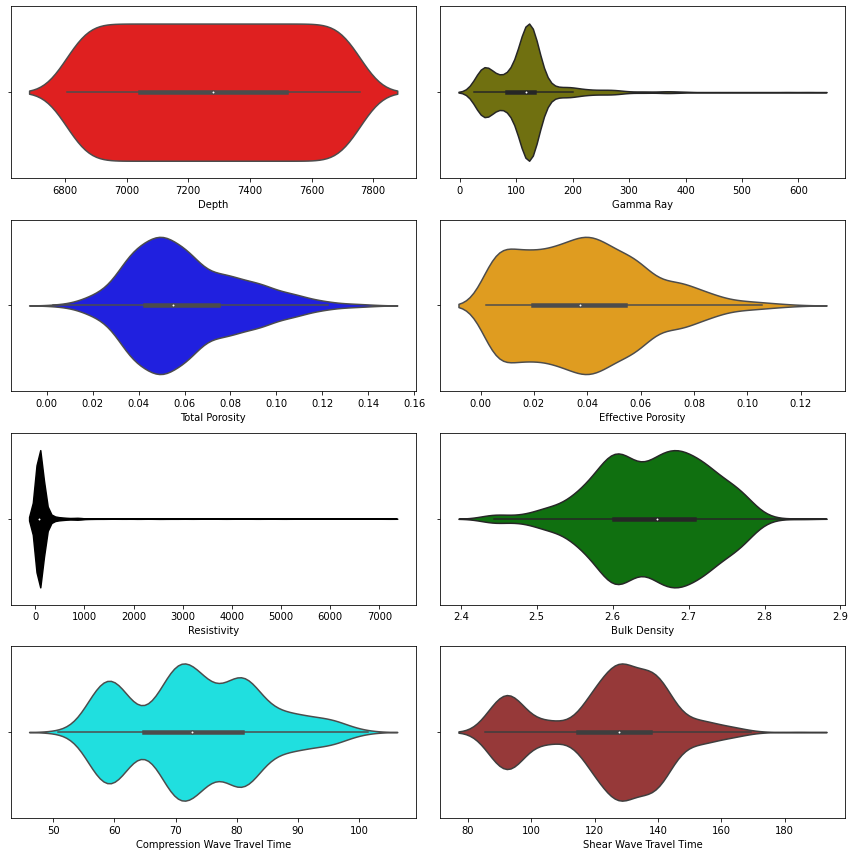

In [11]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.violinplot(df['Depth'] , color="red", ax=axes[0, 0])
sns.violinplot(df['Gamma Ray'] , color="olive", ax=axes[0, 1])
sns.violinplot(df['Total Porosity'] , color="blue", ax=axes[1, 0])
sns.violinplot(df['Effective Porosity'] , color="orange", ax=axes[1, 1])
sns.violinplot(df['Resistivity'] , color="black", ax=axes[2, 0])
sns.violinplot(df['Bulk Density'] , color="green", ax=axes[2, 1])
sns.violinplot(df['Compression Wave Travel Time'] , color="cyan", ax=axes[3, 0])
sns.violinplot(df['Shear Wave Travel Time'] , color="brown", ax=axes[3, 1])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

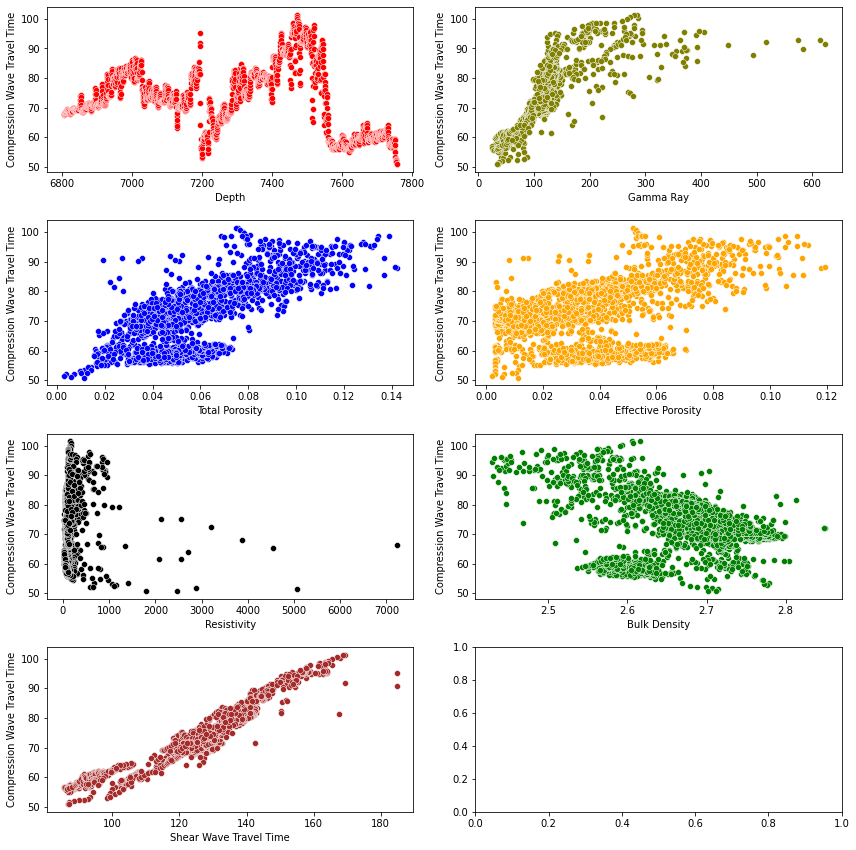

In [12]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.scatterplot(df['Depth'] , df['Compression Wave Travel Time'], color="red", ax=axes[0, 0])
sns.scatterplot(df['Gamma Ray'] , df['Compression Wave Travel Time'], color="olive", ax=axes[0, 1])
sns.scatterplot(df['Total Porosity'] , df['Compression Wave Travel Time'], color="blue", ax=axes[1, 0])
sns.scatterplot(df['Effective Porosity'] ,df['Compression Wave Travel Time'],  color="orange", ax=axes[1, 1])
sns.scatterplot(df['Resistivity'] ,df['Compression Wave Travel Time'],  color="black", ax=axes[2, 0])
sns.scatterplot(df['Bulk Density'] ,df['Compression Wave Travel Time'],  color="green", ax=axes[2, 1])
sns.scatterplot(df['Shear Wave Travel Time'] ,df['Compression Wave Travel Time'],  color="brown", ax=axes[3, 0])
plt.tight_layout()

In [13]:
df=df[(df['Resistivity'] > 0) & (df['Resistivity'] < 1000)]
df=df[(df['Gamma Ray'] > 0) & (df['Gamma Ray'] < 400)]

In [14]:
df.describe()

,Depth,Resistivity,Gamma Ray,Total Porosity,Effective Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
count,1876.00000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,7276.57516,118.725184,114.466974,0.060031,0.038619,2.652918,73.209936,123.927324
std,274.30055,124.065800,54.480503,0.023538,0.023461,0.071691,10.639878,19.172168
min,6805.00000,17.413170,24.463470,0.007090,0.003000,2.428950,52.176420,85.474240
25%,7039.37500,62.534167,84.264097,0.043052,0.019895,2.601500,65.115337,114.947730
50%,7274.75000,84.940170,117.527270,0.055235,0.037365,2.658285,72.792920,127.687235
75%,7509.62500,119.645192,130.776045,0.074658,0.054117,2.707845,80.836615,137.362410
max,7754.50000,986.234070,396.432310,0.142080,0.119320,2.849760,101.455720,184.778790


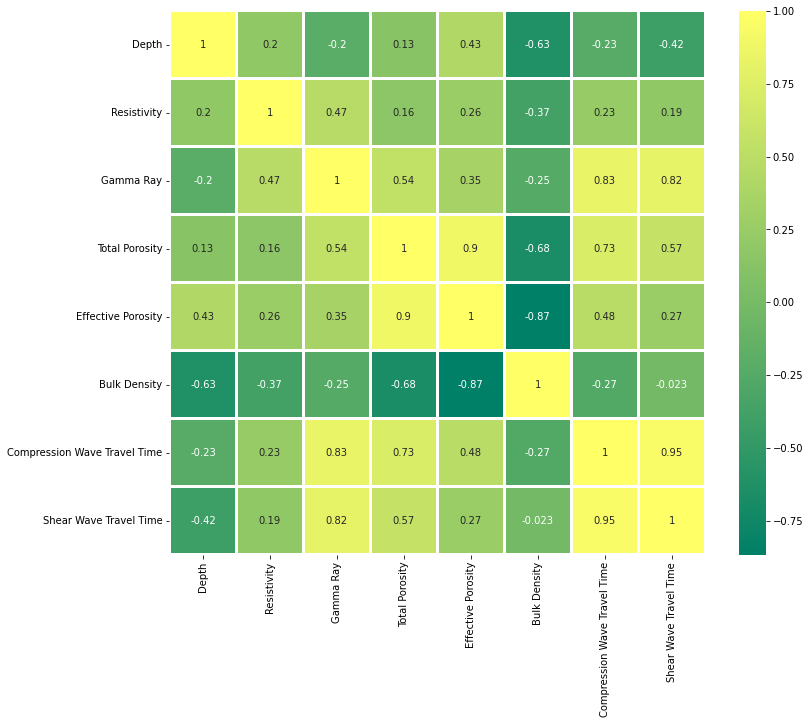

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linecolor='white',linewidths=2, cmap= 'summer')

In [16]:
df.drop(['Effective Porosity'],axis=1, inplace=True)

In [17]:
df.describe()

,Depth,Resistivity,Gamma Ray,Total Porosity,Bulk Density,Compression Wave Travel Time,Shear Wave Travel Time
count,1876.00000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,7276.57516,118.725184,114.466974,0.060031,2.652918,73.209936,123.927324
std,274.30055,124.065800,54.480503,0.023538,0.071691,10.639878,19.172168
min,6805.00000,17.413170,24.463470,0.007090,2.428950,52.176420,85.474240
25%,7039.37500,62.534167,84.264097,0.043052,2.601500,65.115337,114.947730
50%,7274.75000,84.940170,117.527270,0.055235,2.658285,72.792920,127.687235
75%,7509.62500,119.645192,130.776045,0.074658,2.707845,80.836615,137.362410
max,7754.50000,986.234070,396.432310,0.142080,2.849760,101.455720,184.778790


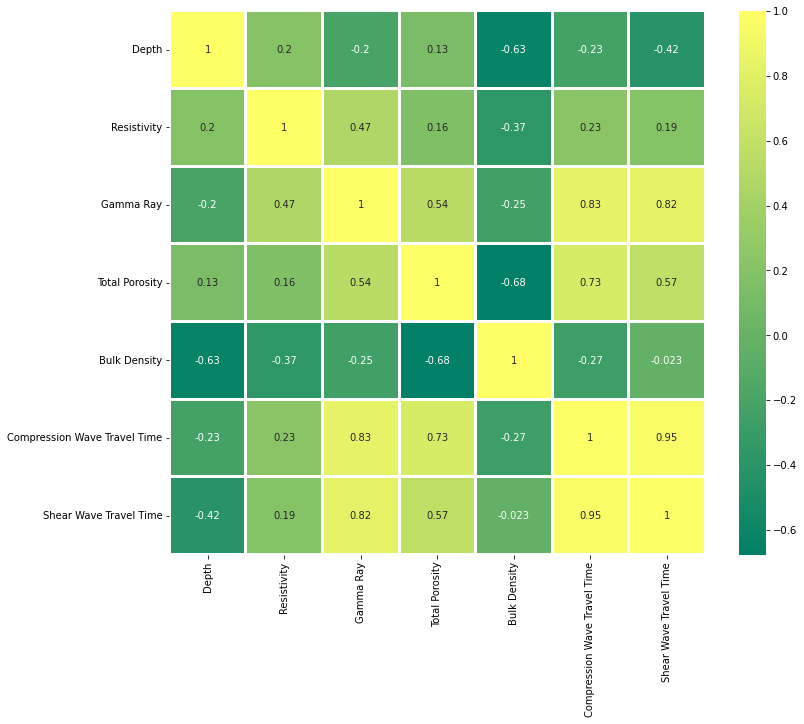

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, linecolor='white',linewidths=2, cmap= 'summer')

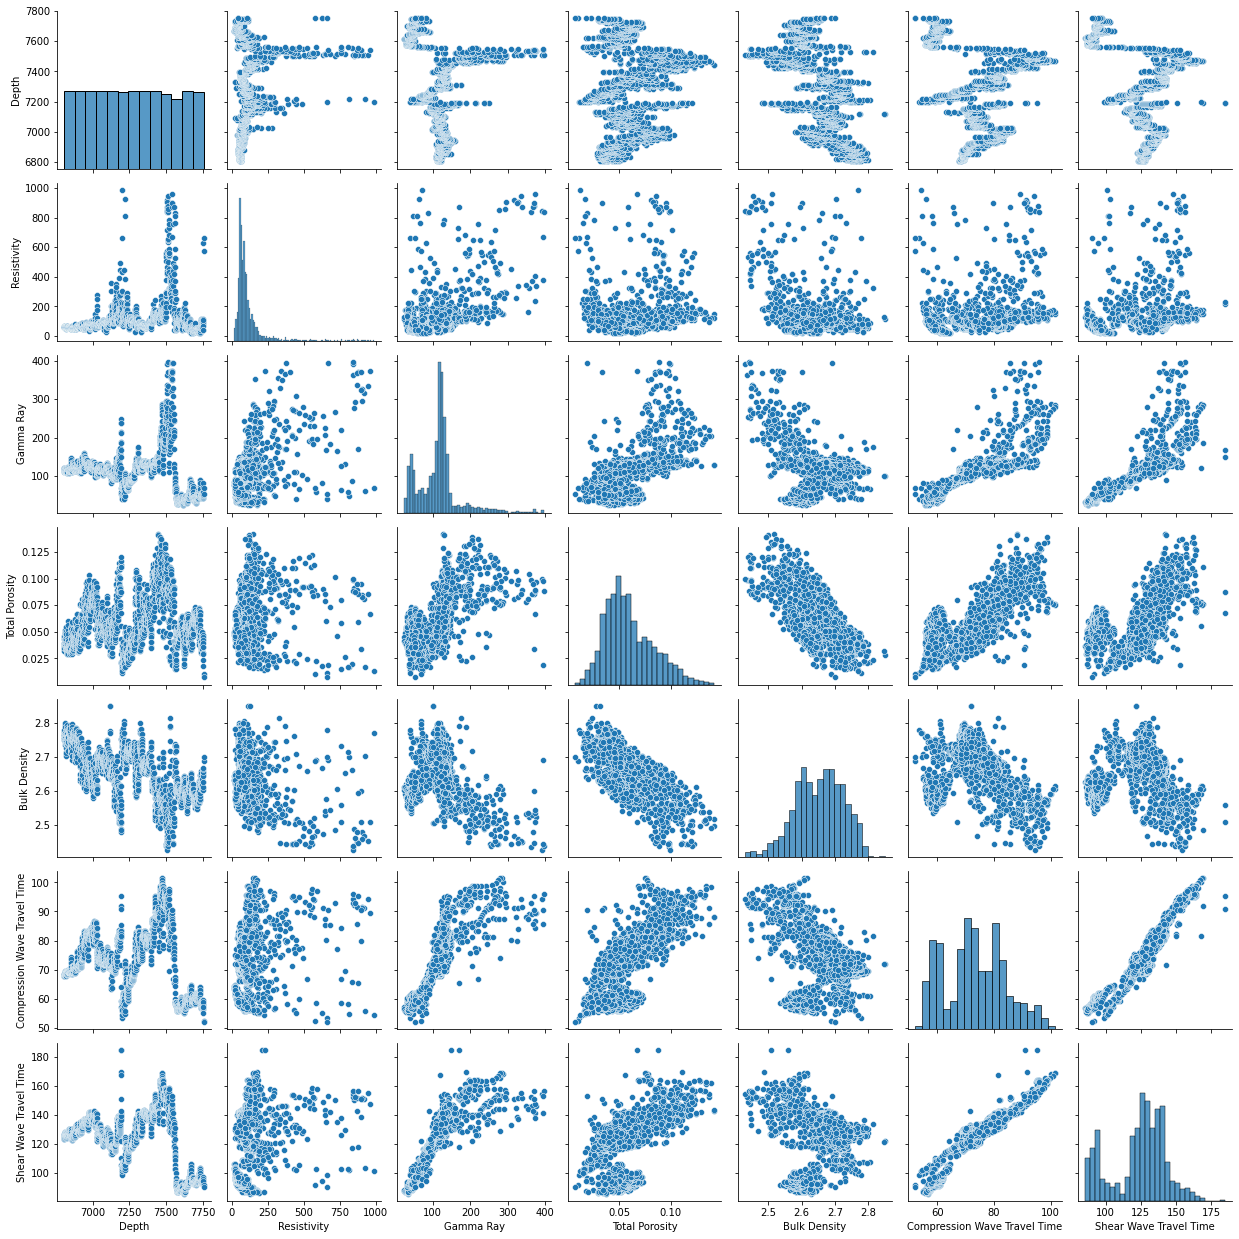

In [19]:
sns.pairplot(df)

In [20]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(df)
df_scaled=scaler.transform(df)
print(df_scaled)

[[0.00000000e+00 4.13468578e-02 2.31242246e-01 ... 8.00384972e-01
  3.14509541e-01 3.88477970e-01]
 [5.26592944e-04 4.27769467e-02 2.37876216e-01 ... 8.00004753e-01
  3.15918043e-01 3.86012121e-01]
 [1.05318589e-03 4.91360168e-02 2.42027209e-01 ... 7.76003422e-01
  3.16072266e-01 3.81965378e-01]
 ...
 [9.97893628e-01 6.28517417e-01 1.56516175e-01 ... 5.65457095e-01
  5.96641998e-02 8.92956063e-02]
 [9.99473407e-01 5.76630913e-01 1.19221384e-01 ... 6.15741071e-01
  1.51118218e-03 6.17068402e-02]
 [1.00000000e+00 6.61815636e-01 7.63945442e-02 ... 6.44067394e-01
  0.00000000e+00 4.65803430e-02]]


In [21]:
df_scaled=pd.DataFrame(df_scaled, columns=['Depth', 'Resistivity', 'Gamma Ray', 'Total Porosity', 'Bulk Density',
       'Compression Wave Travel Time', 'Shear Wave Travel Time'])

y_scaled=df_scaled[['Compression Wave Travel Time', 'Shear Wave Travel Time']]
x_scaled=df_scaled.drop(['Compression Wave Travel Time', 'Shear Wave Travel Time'], axis=1)

print(x_scaled)
print(y_scaled)

         Depth  Resistivity  Gamma Ray  Total Porosity  Bulk Density
0     0.000000     0.041347   0.231242        0.202978      0.800385
1     0.000527     0.042777   0.237876        0.222757      0.800005
2     0.001053     0.049136   0.242027        0.231054      0.776003
3     0.001580     0.047419   0.246264        0.196681      0.760367
4     0.002106     0.046314   0.250608        0.184458      0.779259
...        ...          ...        ...             ...           ...
1871  0.996840     0.025039   0.095539        0.166901      0.539911
1872  0.997367     0.095893   0.126890        0.120602      0.557972
1873  0.997894     0.628517   0.156516        0.083265      0.565457
1874  0.999473     0.576631   0.119221        0.023557      0.615741
1875  1.000000     0.661816   0.076395        0.000000      0.644067

[1876 rows x 5 columns]
      Compression Wave Travel Time  Shear Wave Travel Time
0                         0.314510                0.388478
1                         0.3

In [22]:
seed= 1000
np.random.seed(seed)
X_train,X_test,y_train, y_test= train_test_split(x_scaled, y_scaled, test_size=0.30)

In [23]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
np.random.seed(seed)

SVM = MultiOutputRegressor((SVR(kernel='rbf', gamma=1,C=1)))


SVM.fit(X_train,y_train)
y_pred_train=SVM.predict(X_train)
y_pred_test=SVM.predict(X_test)

In [24]:
corr_train1=np.corrcoef(y_train['Compression Wave Travel Time'], y_pred_train[:,0]) [0,1]
corr_train2=np.corrcoef(y_train['Shear Wave Travel Time'], y_pred_train[:,1]) [0,1]


print('Compression Wave Travel Time Train Data r^2=',round(corr_train1**2,4),'r=', round(corr_train1,4))
print('Shear Wave Travel Time Train Data r^2=',round(corr_train2**2,4),'r=', round(corr_train2,4))

Compression Wave Travel Time Train Data r^2= 0.9257 r= 0.9621
Shear Wave Travel Time Train Data r^2= 0.9182 r= 0.9582


In [25]:
corr_test1=np.corrcoef(y_test['Compression Wave Travel Time'], y_pred_test[:,0]) [0,1]
corr_test2=np.corrcoef(y_test['Shear Wave Travel Time'], y_pred_test[:,1])[0,1]

print('Compression Wave Travel Time Test Data r^2=',round(corr_test1**2,4),'r=', round(corr_test1,4))
print('Shear Wave Travel Time Test Data r^2=',round(corr_test2**2,4),'r=', round(corr_test2,4))

Compression Wave Travel Time Test Data r^2= 0.928 r= 0.9633
Shear Wave Travel Time Test Data r^2= 0.9277 r= 0.9632


Text(0.5, 1.0, 'Compression Wave Travel Time Testing Actual Vs. Prediction')

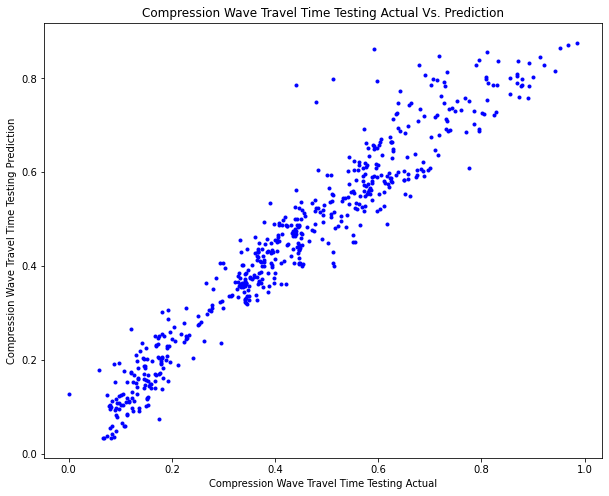

In [26]:
plt.figure(figsize=(10,8))
plt.plot(y_test['Compression Wave Travel Time'], y_pred_test[:,0], 'b.')
plt.xlabel('Compression Wave Travel Time Testing Actual')
plt.ylabel('Compression Wave Travel Time Testing Prediction')
plt.title('Compression Wave Travel Time Testing Actual Vs. Prediction')

Text(0.5, 1.0, 'Shear Wave Travel Time Testing Actual Vs. Prediction')

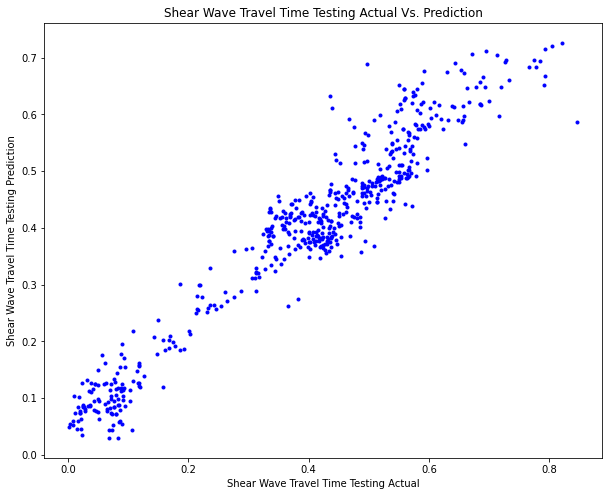

In [27]:
plt.figure(figsize=(10,8))
plt.plot(y_test['Shear Wave Travel Time'], y_pred_test[:,1], 'b.')
plt.xlabel('Shear Wave Travel Time Testing Actual')
plt.ylabel('Shear Wave Travel Time Testing Prediction')
plt.title('Shear Wave Travel Time Testing Actual Vs. Prediction')

In [28]:
from sklearn import metrics
print('Testing Compression MAE:', round(metrics.mean_absolute_error(y_test['Compression Wave Travel Time'], y_pred_test[:,0]),4))
print('Testing Compression MSE:', round(metrics.mean_squared_error(y_test['Compression Wave Travel Time'], y_pred_test[:,0]),4))
print('Testing Compression RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test['Compression Wave Travel Time'], y_pred_test[:,0])),4))

Testing Compression MAE: 0.0457
Testing Compression MSE: 0.0036
Testing Compression RMSE: 0.0599


In [29]:
print('Testing Shear MAE:', round(metrics.mean_absolute_error(y_test['Shear Wave Travel Time'], y_pred_test[:,1]),4))
print('Testing Shear MSE:', round(metrics.mean_squared_error(y_test['Shear Wave Travel Time'], y_pred_test[:,1]),4))
print('Testing Shear RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test['Shear Wave Travel Time'], y_pred_test[:,1])),4))

Testing Shear MAE: 0.0437
Testing Shear MSE: 0.0029
Testing Shear RMSE: 0.0542
